# Lasso / Ridge / ElasticNet Regression

# References



[Choosing the right estimator](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)

[sklearn.linear_model.Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)

[sklearn.linear_model.Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)

[Machine Learning Algorithms Part 11: Ridge Regression, Lasso Regression And Elastic-Net Regression](https://medium.com/@corymaklin/machine-learning-algorithms-part-11-ridge-regression-7d5861c2bc76)

[What is the difference between Ridge Regression, the LASSO, and ElasticNet?](https://alexlenail.medium.com/what-is-the-difference-between-ridge-regression-the-lasso-and-elasticnet-ec19c71c9028.)

# References

## Подготовка окружения

In [ ]:
# ВНИМАНИЕ: необходимо удостовериться, что виртуальная среда выбрана правильно!

# Для MacOS/Ubuntu
# !which pip

# Для Windows
# !where pip

In [ ]:
# !conda install matplotlib numpy scikit-learn seaborn -y

In [3]:
import numpy as np

np.__version__

'1.19.2'

In [4]:
import pandas as pd

pd.__version__

'1.2.3'

In [5]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.__version__

'3.3.4'

In [6]:
import seaborn as sns

sns.__version__

'0.11.1'

## Загрузка данных

[Источник (FuelConsumption)](https://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)

In [7]:
df = pd.read_csv("./../../data/FuelConsumptionCo2.csv")
df

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


## Разделение данных

In [8]:
from sklearn.model_selection import train_test_split

y = df["CO2EMISSIONS"].copy()
X = df[["ENGINESIZE"]].copy()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)

## Lasso (least absolute shrinkage and selection operator/оператор наименьшей абсолютной усадки и выбора)

[sklearn.linear_model.Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)

Линейная модель, обученная с `L1` регуляризатором (также известная как Лассо).

Технически модель Lasso оптимизирует ту же целевую функцию, что и Elastic Net, с `l1_ratio=1.0` (без штрафа `L2`).

Реализация в классе Lasso использует [покоординатного спуска (coordinate descent)](https://ru.wikipedia.org/wiki/%D0%93%D1%80%D0%B0%D0%B4%D0%B8%D0%B5%D0%BD%D1%82%D0%BD%D1%8B%D0%B5_%D0%BC%D0%B5%D1%82%D0%BE%D0%B4%D1%8B#%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%BF%D0%BE%D0%BA%D0%BE%D0%BE%D1%80%D0%B4%D0%B8%D0%BD%D0%B0%D1%82%D0%BD%D0%BE%D0%B3%D0%BE_%D1%81%D0%BF%D1%83%D1%81%D0%BA%D0%B0_%D0%93%D0%B0%D1%83%D1%81%D1%81%D0%B0_%E2%80%94_%D0%97%D0%B5%D0%B9%D0%B4%D0%B5%D0%BB%D1%8F) в качестве алгоритма подбора коэффициентов.

### Обучение модели (Train)

In [20]:
from sklearn.linear_model import Lasso

model = Lasso()
model.fit(X_train, y_train)

print("Alpha: ", model.alpha)
print("Coefficients: ", model.coef_)
print("Intercept: ", model.intercept_)

Alpha:  1.0
Coefficients:  [38.66364945]
Intercept:  127.68747225472251


### Оценка качества модели (Evaluation)

In [10]:
from sklearn.metrics import r2_score

y_predicted = model.predict(X_test)

print("Mean absolute error: %.2f" % np.mean(np.absolute(y_predicted - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_predicted - y_test) ** 2))
print("R2-score: %.2f" % r2_score(y_true=y_test, y_pred=y_predicted))

Mean absolute error: 23.57
Residual sum of squares (MSE): 957.86
R2-score: 0.76


### Визуализация (Visualization)

Text(0, 0.5, 'Emission')

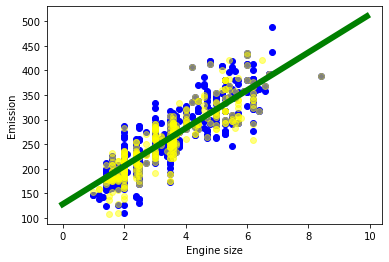

In [11]:
plt.scatter(X_train, y_train, color="blue")
plt.scatter(X_test, y_test, color="yellow", alpha=0.5)

XX = np.arange(0.0, 10.0, 0.1)
yy = model.intercept_ + model.coef_[0] * XX

plt.plot(XX, yy, "-g", linewidth=6)

plt.xlabel("Engine size")
plt.ylabel("Emission")

## Ridge

[sklearn.linear_model.Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html?highlight=ridge#sklearn.linear_model.Ridge)

Линейный метод наименьших квадратов с регуляризацией l2.

Эта модель реализует регрессионную модель, в которой функция потерь является линейной функцией наименьших квадратов, а регуляризация задается l2-нормой.

Параметр сложности $\alpha >= 0$ управляет степенью усадки (shrinkage): чем **больше значение $\large \alpha$**, тем больше величина усадки, и, таким образом, коэффициенты становятся **более устойчивыми к коллинеарности**.

Класс [sklearn.linear_model.RidgeCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html#sklearn.linear_model.RidgeCV) реализует Ridge регрессию со встроенной перекрестной проверкой (cross-validation) альфа-параметра. Объект работает так же, как GridSearchCV, за исключением того, что по умолчанию используется перекрестная проверка [Leave-One-Out](https://scikit-learn.org/stable/modules/cross_validation.html#leave-one-out-loo).

`LeaveOneOut` (или LOO) - это простая перекрестная проверка. Каждый обучающий набор создается путем взятия всех выборок, кроме одной, причем тестовая выборка не учитывается. Таким образом, для `n` выборок есть `n` разных обучающих наборов и `n` разных наборов тестов. Эта процедура перекрестной проверки не тратит много данных, поскольку из обучающего набора удаляется только один образец.

Основное **различие Lasso и Ridge** регрессий заключается в том, что первая может приводить к обращению некоторых независимых переменных в ноль (используется L1-регуляризатор), тогда как вторая уменьшает их до значений, близких к нулю (используется L2-регуляризатор).

### Обучение модели (Train)

In [18]:
from sklearn.linear_model import RidgeCV

model = RidgeCV()
model.fit(X_train, y_train)

print("Alpha: ", model.alpha_)
print("Coefficients: ", model.coef_)
print("Intercept: ", model.intercept_)

Alpha:  1.0
Coefficients:  [39.14061516]
Intercept:  126.09591648978568


### Оценка качества модели (Evaluation)

In [16]:
from sklearn.metrics import r2_score

y_predicted = model.predict(X_test)

print("Mean absolute error: %.2f" % np.mean(np.absolute(y_predicted - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_predicted - y_test) ** 2))
print("R2-score: %.2f" % r2_score(y_true=y_test, y_pred=y_predicted))

Mean absolute error: 23.56
Residual sum of squares (MSE): 957.62
R2-score: 0.76


### Визуализация (Visualization)

Text(0, 0.5, 'Emission')

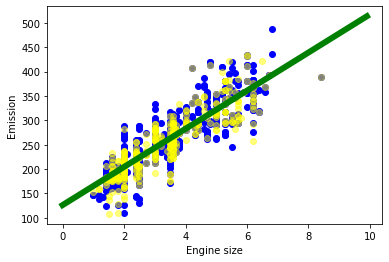

In [14]:
plt.scatter(X_train, y_train, color="blue")
plt.scatter(X_test, y_test, color="yellow", alpha=0.5)

XX = np.arange(0.0, 10.0, 0.1)
yy = model.intercept_ + model.coef_[0] * XX

plt.plot(XX, yy, "-g", linewidth=6)

plt.xlabel("Engine size")
plt.ylabel("Emission")

## ElasticNet

[sklearn.linear_model.ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)

Линейная регрессия с `L1` и `L2` в качестве регуляризатора.

Эта комбинация позволяет изучать разреженную модель, в которой несколько весов отличны от нуля, как у Лассо, при этом сохраняя свойства регуляризации Ridge.

ElasticNet полезна, когда есть несколько признаков, которые коррелируют друг с другом. Лассо, вероятно, выберет одно из них наугад, а ElasticNet- и то, и другое.

Практическое преимущество компромисса между Lasso и Ridge заключается в том, что он позволяет Elastic-Net унаследовать часть стабильности Ridge.

Класс [sklearn.linear_model.ElasticNetCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNetCV.html#sklearn.linear_model.ElasticNetCV) можно использовать для установки параметров `alpha` ($\alpha$) и `l1_ratio` ($\rho$) путем cross-validation.

### Обучение модели (Train)

In [21]:
from sklearn.linear_model import ElasticNetCV

model = ElasticNetCV()
model.fit(X_train, y_train)

print("Alpha: ", model.alpha_)
print("Coefficients: ", model.coef_)
print("Intercept: ", model.intercept_)

Alpha:  0.15523598262834545
Coefficients:  [37.65425759]
Intercept:  131.05564607670144


### Оценка качества модели (Evaluation)

In [22]:
from sklearn.metrics import r2_score

y_predicted = model.predict(X_test)

print("Mean absolute error: %.2f" % np.mean(np.absolute(y_predicted - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_predicted - y_test) ** 2))
print("R2-score: %.2f" % r2_score(y_true=y_test, y_pred=y_predicted))

Mean absolute error: 23.62
Residual sum of squares (MSE): 961.46
R2-score: 0.76


### Визуализация (Visualization)

Text(0, 0.5, 'Emission')

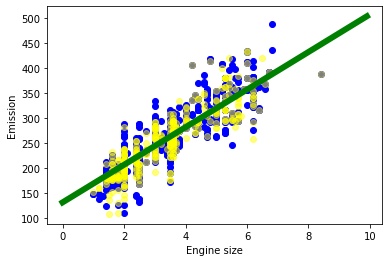

In [23]:
plt.scatter(X_train, y_train, color="blue")
plt.scatter(X_test, y_test, color="yellow", alpha=0.5)

XX = np.arange(0.0, 10.0, 0.1)
yy = model.intercept_ + model.coef_[0] * XX

plt.plot(XX, yy, "-g", linewidth=6)

plt.xlabel("Engine size")
plt.ylabel("Emission")